# Constructing a recommendation system for anime

Since young, my friends and I have occasionally enjoyed watching various anime. Having been born directly into a golden era of anime, we always had an endless selection of things to watch but struggled to find anime similar to the ones that we had enjoyed. Even today, we're still searching for hidden gems that might be out there. Being unsatistfied with the recommendations given by streaming platforms, I decided that I'd take a stab at building my own recommendation system. I thought it would be fun an something practical that I could use. 

I eventually found a really cool anime series called Memories from 1995. It features 3 independent films of which my favourite was Magnetic Rose- one of the best anime films i've ever seen. I'd highly recommend. 


Here is a breakdown of each section of the project:

1. Basic Data Exploration
2. Exploratory Data Analysis (EDA)
3. Building a Recommendation System
4. Buidling Out a More Specific Content Based Anime Recommendation System 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')


# Basic Data Exploration

In [4]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating.csv/rating.csv")

In [5]:
print(anime.shape)
anime.head()

(12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
print(anime.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [7]:
print(rating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


In [8]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [9]:
#removal of nulls from anime dataset
anime.dropna(axis = 0, inplace = True)
anime.isna().sum().to_frame()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [10]:
#Checking for duplicates in anime dataset
duplicate_check = anime[anime.duplicated()].shape[0]
print(duplicate_check)

0


In [11]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [12]:
#checking for null values in ratings dataset
rating.isna().sum().to_frame()

,0
user_id,0
anime_id,0
rating,0


In [13]:
#removal of duplicates in the ratings dataset
rating.drop_duplicates(keep='first',inplace=True)
rating[rating.duplicated()].shape[0]

0

# Merging data

In [14]:
df = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"])
df = df.rename(columns={"rating_user": "user_rating"})

print({df.shape})

#Summary statistics of data table
def table_top(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:350px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

numerical_features = df.select_dtypes(include=[np.number])
summary_statistics = numerical_features.describe().T
html_numerical = table_top(summary_statistics, 'numerical_features', 'Summary statistics')

display(HTML(html_numerical))

{(7813610, 9)}


,count,mean,std,min,25%,50%,75%,max
anime_id,7813610.0,8908.728488,8883.597991,1.00,1240.00,6213.00,14093.00,34519.0
rating,7813610.0,7.653158,0.672975,1.67,7.27,7.68,8.13,9.5
members,7813610.0,178623.308698,188176.439918,29.00,44030.00,110470.00,244268.00,1013917.0
user_id,7813610.0,36727.992752,20997.925388,1.00,18974.00,36791.00,54758.00,73516.0
user_rating,7813610.0,6.144075,3.727792,-1.00,6.00,7.00,9.00,10.0


# Exploratory Data Analysis


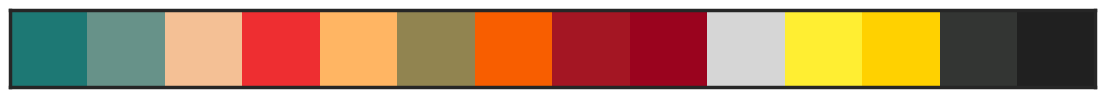

In [15]:
#Color palette used in the EDA 
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

### Top anime communities

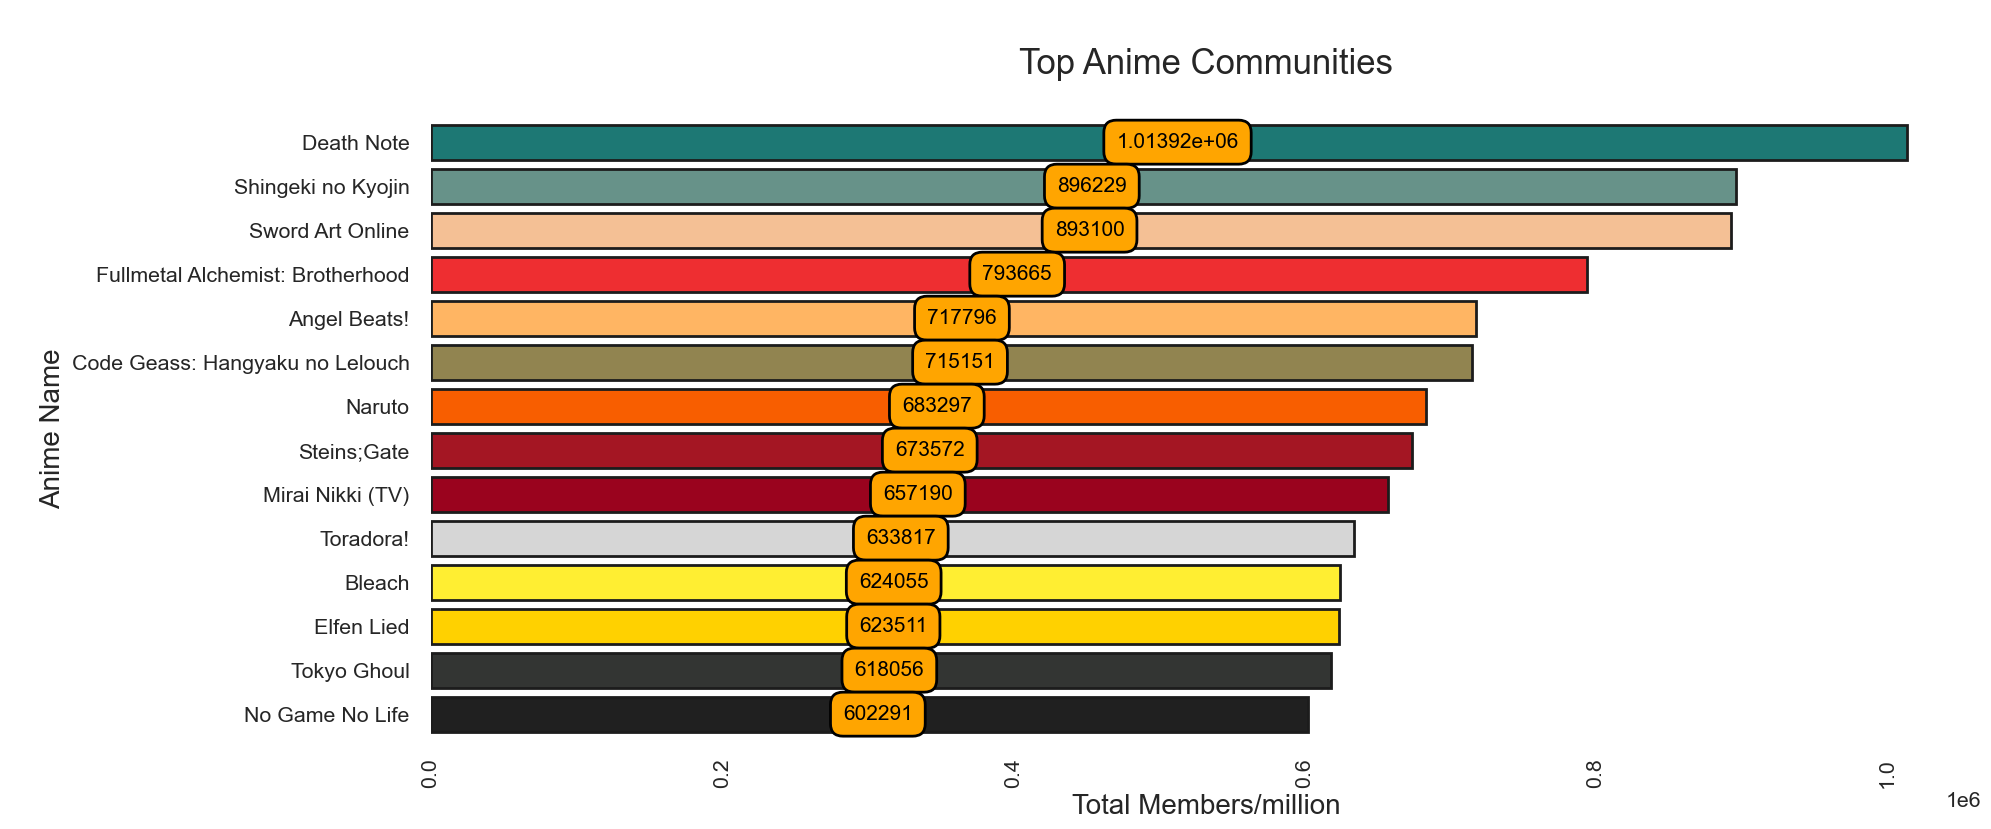

In [16]:
#Analysis of top Anime communities

top_anime = df.copy()
top_anime.drop_duplicates(subset="name", keep="first", inplace=True)
top_anime_temp1 = top_anime.sort_values(["members"], ascending=False)

plt.subplots(figsize=(20, 8))
p = sns.barplot(y=top_anime_temp1["name"][:14], x=top_anime_temp1["members"], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
p.axes.set_title("\nTop Anime Communities\n", fontsize=25)
plt.xlabel("Total Members/million", fontsize=20)
plt.ylabel("\nAnime Name", fontsize=20)
# plt.xscale("log")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=6, size=15, color="black", rotation=0,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()



**Insights:**

Death Note, Shingeki no Kyojin and Sword Art Online appear to be the most popular communities. This is helpful to know because these are the Animes we'd typically see a larger volume of people enter into our system for a reccomendation

### Distribution of anime mediums

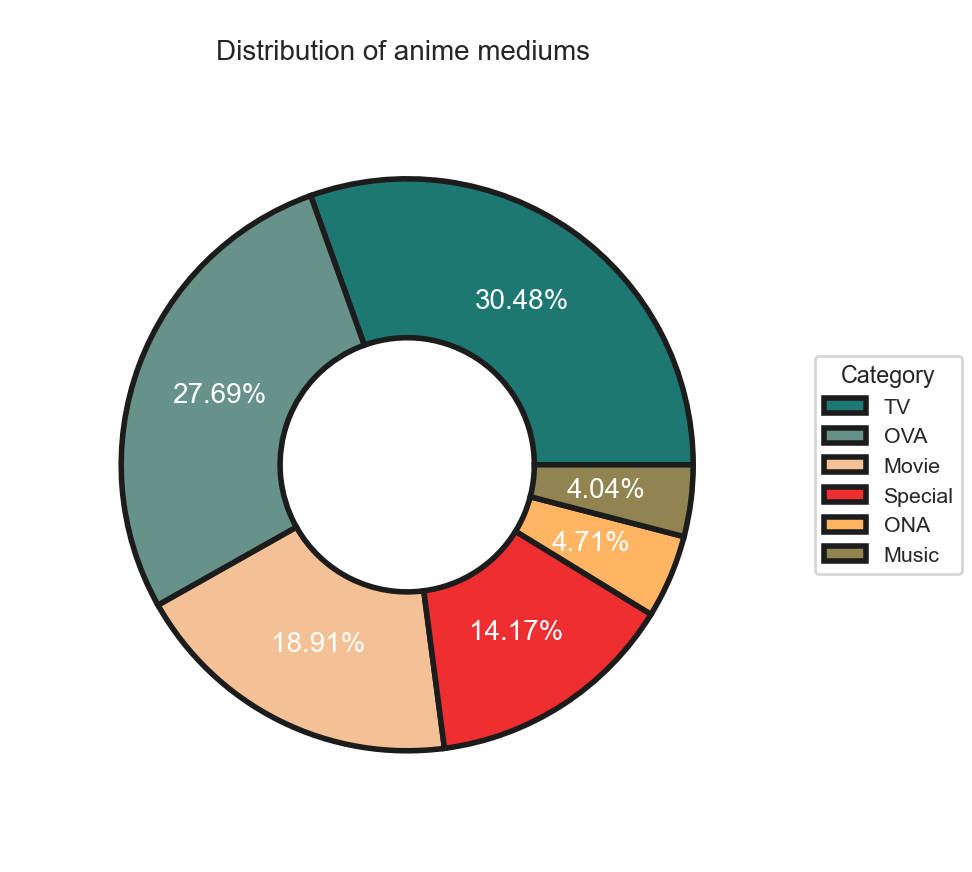

In [17]:
plt.subplots(figsize=(10, 10))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.7,
                                    radius=.9, 
                                    colors = palette, 
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c", 
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nDistribution of anime mediums ",fontsize=20)
plt.tight_layout()
plt.show()

**Insights:**

A majority of Animes we're either aired as a movie, on TV or as an OVA (original video animation- non cannon storylines) with both Television and OVA being the largest mediums. 

### Distribution of average anime ratings


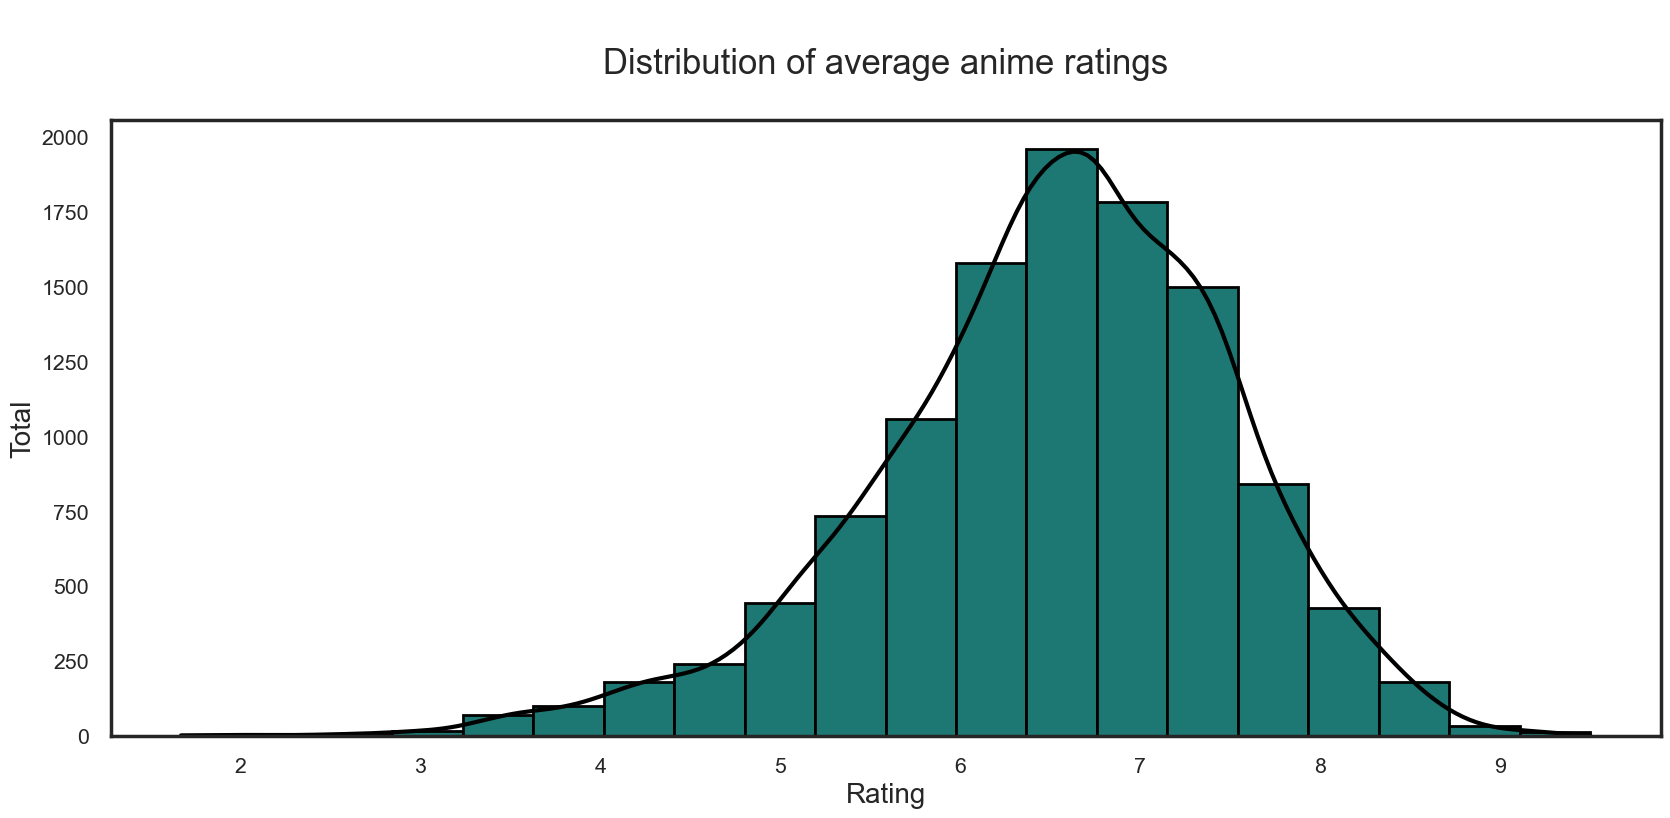

In [18]:
top_anime_temp2 = top_anime.sort_values(["rating"], ascending=False)

plt.figure(figsize=(20, 8))

sns.histplot(top_anime_temp2["rating"], color=palette[0], kde=True, bins=20, alpha=1, fill=True, edgecolor="black")
plt.title("\nDistribution of average anime ratings\n", fontsize=25)
plt.xlabel("Rating", fontsize=20)
plt.ylabel("Total", fontsize=20)

plt.gca().lines[0].set_color("black")
plt.show()


**Insights:**

1. Most of the Anime ratings are spread between 5.5 - 8.0
2. The mode of the users ratings distribution is around 7.0 - 8.0
3. The distribution of user ratings is skewed towards higher ratings 

### Ratings of top anime


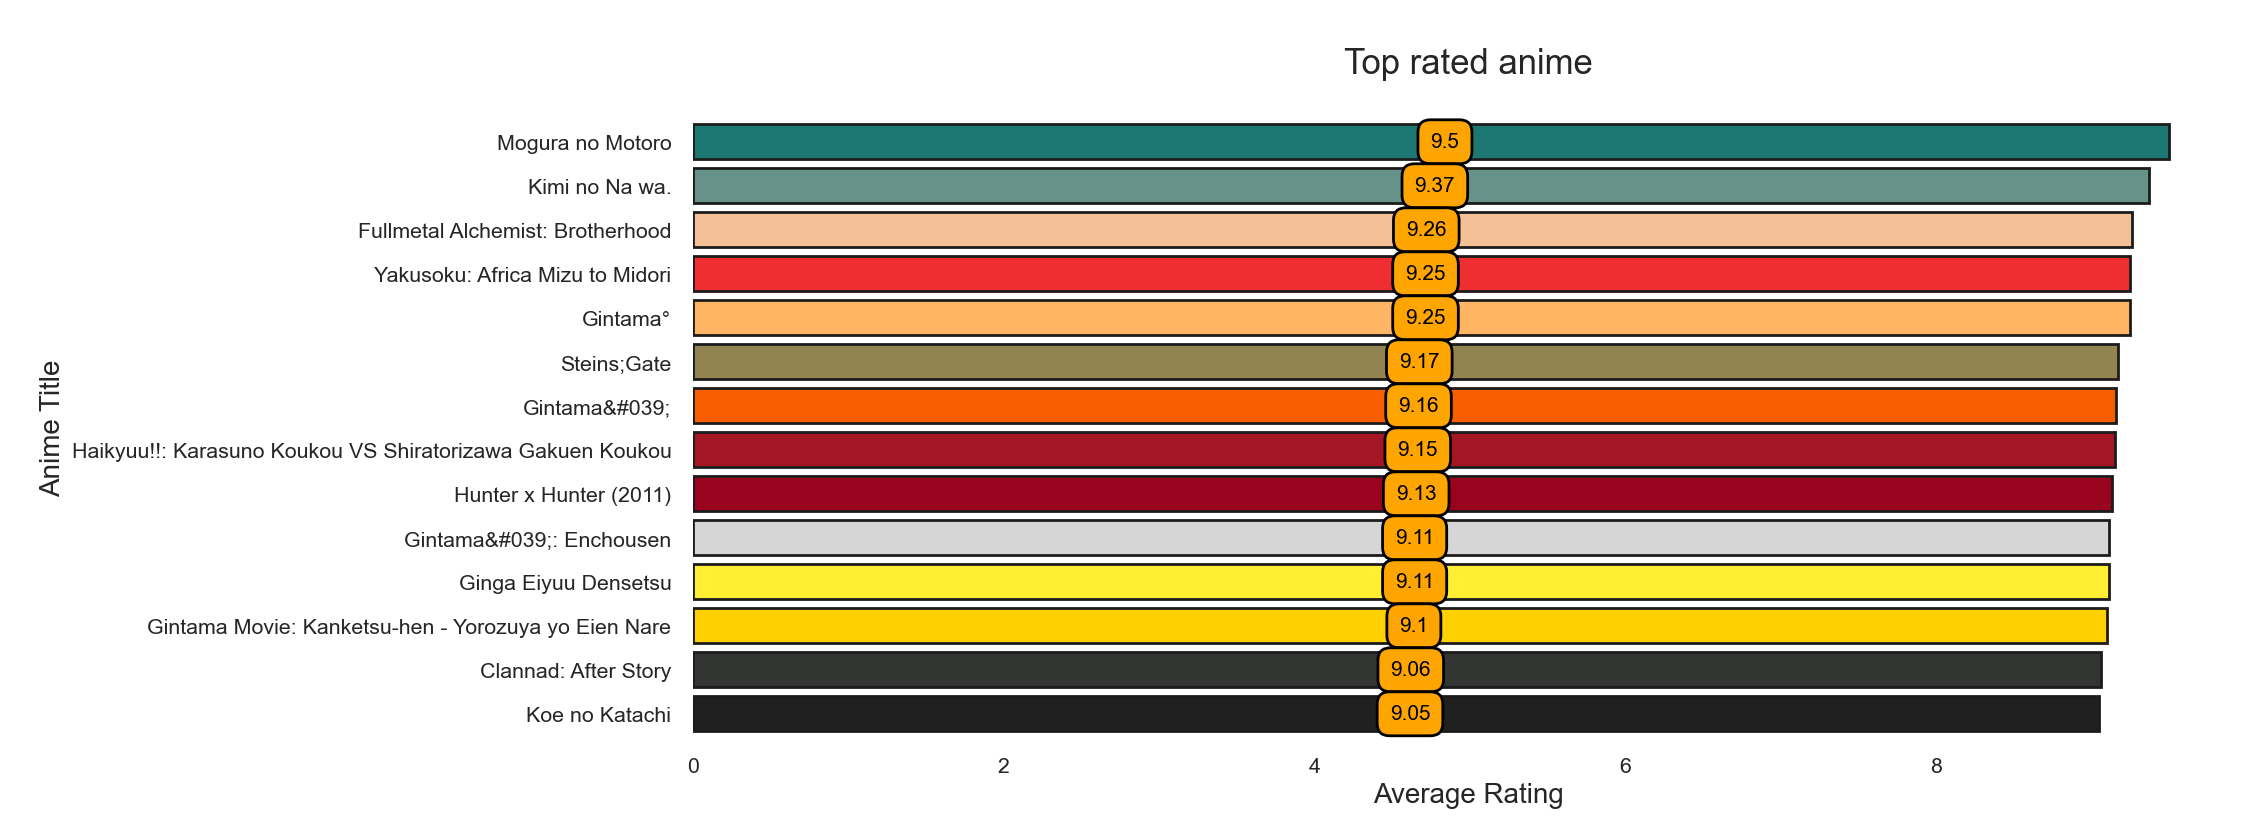

In [19]:
plt.subplots(figsize=(20, 8))
p = sns.barplot(y=top_anime_temp2["name"][:14], x=top_anime_temp2["rating"], palette=palette, saturation=1, edgecolor="#1c1c1c", linewidth=2)
p.axes.set_title("\nTop rated anime\n", fontsize=25)
plt.xlabel("Average Rating", fontsize=20)
plt.ylabel("\nAnime Title", fontsize=20)

plt.yticks(rotation=0)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=10, size=15, color="black", rotation=0,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()


**Insights:**

We can see that aside from Mogura no Motoro, there isn't a huge difference in ratings between the top rated anime. There are also some anime such as Fullmetal Alchemist Brotherhood and Steins Gate that are both some of the highest rated anime and have some of the largest communities. 

### Distribution of anime genres

In [20]:
top_anime_temp3 = top_anime[["genre"]]
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

top_anime_temp3["genre"].value_counts().to_frame()

,genre
Comedy,4271
Action,2686
Adventure,2197
Fantasy,2107
Sci-Fi,1981
Drama,1857
Shounen,1636
Romance,1420
Kids,1306
School,1135


**Insights:**

It's interesting to see that comedy is by and far the largest genre. I think there is also a lot of overlap in the genres which is something to consider. 

# Data Transformation

In [21]:
df2 = df.copy()
df2["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
df2 = df2.dropna(axis = 0)
df2.isna().sum().to_frame()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0
user_id,0
user_rating,0


In [22]:
#I decided to remove users with less than 30 reviews to help ensure that we're maximizing the value of our recommendations
selected_users = df2["user_id"].value_counts()
df2 = df2[df2["user_id"].isin(selected_users[selected_users >= 30].index)]

In [23]:
#I am creating a pivot table that will be later used to create a sparse matrix which helps us find cosine similarity
df2_pivot_temp = df2.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
df2_pivot_temp.head()

user_id,3,5,7,11,14,17,21,23,24,25,...,73499,73500,73501,73502,73503,73504,73507,73510,73513,73515
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Eiji&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#To futher clean up the data, I had to eliminate many japanaese characters and symbols in the anime names

import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

df2["name"] = df2["name"].apply(text_cleaning)

In [25]:
#final dataset
df2_final = df2.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
df2_final.head()

user_id,3,5,7,11,14,17,21,23,24,25,...,73499,73500,73501,73502,73503,73504,73507,73510,73513,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building a recommendation system

**Collaborative Filtering**

Collaborative filtering is a powerful method used in recommendation systems that can identify items a user may appreciate based on the behavior of other users who have similar tastes. To achieve this, the method starts by analyzing a vast pool of users, essentially looking for patterns or commonalities in their behavior or reactions to certain items. Once it identifies a subset of users who share comparable preferences to a targeted user, it can predict and recommend items that the target user might find appealing based on what the similar users have liked.

**Cosine Similarity**

Within the context of collaborative filtering, we often utilize a metric called cosine similarity. This technique is typically used to determine the similarity between two documents, but the beauty of it is that it remains effective regardless of the size of the documents. 

Mathematically, cosine similarity calculates the cosine of the angle between two vectors in a multi-dimensional space. To visualize this, imagine each document being represented as a vector, where each word or feature within the document represents a dimension. Thus, two documents on similar topics would likely share many of the same words or features, placing their vectors in similar directions. 

This is where cosine similarity shines. It is less concerned about the distance between the two vectors (which would be significantly affected by the size or length of the documents, as measured by Euclidean distance), and more focused on the orientation of the vectors. This means even if two documents have vastly different lengths, as long as they share a similar theme or subject matter, their vectors will point in similar directions, indicating a high cosine similarity. 

In essence, the smaller the angle between the two vectors, the higher the cosine similarity, indicating a greater level of similarity between the documents. This can be incredibly beneficial in identifying shared interests among users or similarities among items, leading to more effective and personalized recommendations.

In [28]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(df2_final.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(df2_final.shape[0]) # random anime title and finding recommendation
distances, indices = model_knn.kneighbors(df2_final.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

In [29]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {df2_final.index[query_no]} viewers :\n")
    else:        
        no.append(i)
        name.append(df2_final.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==df2_final.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation.style

Recommendations for Yu☆Gi☆Oh! Zexal Second: Iza! Saishuu Kessen e!! Special viewers :



,Anime Name,Rating
No,,
1,Yu☆Gi☆Oh! Zexal Second: Midokoro Tenkomori Special,6.320000
2,Yu☆Gi☆Oh! Zexal Special,6.340000
3,Tottoko Hamtarou OVA 4: Hamuchanzu no Mezase! Hamuhamu Kin Medal - Hashire! Hashire! Daisakusen,6.550000
4,Tottoko Hamtarou OVA 3: Hamuchanzu to Niji no Kuni no Oujisama - Sekai de Ichiban no Takaramono,6.600000
5,Teppen,4.690000


# Content based recommendation system



**Content-Based Filtering Approach**

In a content-based filtering approach, recommendations are made based on a comparison between the content of items and a user's profile. The 'content' of each item refers to a set of descriptors or terms - typically, the words that appear in a document. This method works with data that the user provides, which can either be explicit, such as ratings, or implicit, like clicking on a link. 

A user profile is generated from this data, which serves as the basis for future recommendations. As the user provides more inputs or interacts with the recommendations, the system evolves and refines its suggestions, making it increasingly accurate and tailored to the user's preferences.

**Term Frequency (TF) and Inverse Document Frequency (IDF)**

A key mechanism in content-based filtering is the use of Term Frequency (TF) and Inverse Document Frequency (IDF) measures. TF refers to the frequency of a word in a document, while IDF is a measure of how much information the word provides - it's the inverse of the word's prevalence in a corpus of documents.

TF-IDF, which combines these two measures, is crucial for two main reasons. First, it helps adjust for the fact that some words appear more frequently in general. For instance, if you search for "the rise of analytics" on Google, "the" will appear far more often than "analytics", yet from the perspective of the search query, "analytics" is more important. By lowering the weight of common words, TF-IDF allows less frequent but more informative words to play a bigger role in determining the relevance of a document.

In our case, we will apply TF-IDF to anime genres, creating a basis for recommending content to users. This means users will receive suggestions for animes that align closely with the genres they have shown an interest in through their behavior.


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = df.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)

In [31]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe.style.set_properties(**{"background-color": palette[0],"color":"white","border": "1.5px  solid black"})

In [32]:
give_recommendation("Naruto")

Recommendations for Naruto viewers :



,Anime Name,Rating
No,,
1,To LOVE-Ru Darkness OVA,7.820000
2,Hanbun no Tsuki ga Noboru Sora,7.690000
3,Mai-HiME,7.590000
4,Doraemon Movie 28: Nobita to Midori no Kyojin Den,7.540000
5,Rurouni Kenshin Special,7.510000
6,Pikmin Short Movies,7.270000
7,Deadman Wonderland OVA,7.120000
8,Anata mo Robot ni Nareru feat. Kamome Jidou Gasshoudan,5.120000
9,Shinpi no Hou,5.370000


In [33]:
give_recommendation("Death Note")

Recommendations for Death Note viewers :



,Anime Name,Rating
No,,
1,Hachimitsu to Clover Specials,7.850000
2,Trapp Ikka Monogatari,7.750000
3,Major S1,8.420000
4,Hakkenden: Touhou Hakken Ibun,7.570000
5,Ushi Atama,4.870000
6,ef: A Tale of Melodies.,8.180000
7,Saki Achiga-hen: Episode of Side-A Specials,7.630000
8,One Piece: Oounabara ni Hirake! Dekkai Dekkai Chichi no Yume!,7.430000
9,Kizumonogatari II: Nekketsu-hen,8.730000


In [42]:
import ipywidgets as widgets
from IPython.display import display

#Input text box
title_input = widgets.Text(
    value='',
    placeholder='Type the anime title',
    description='Anime title:',
    disabled=False
)
display(title_input)

#Button widget
button = widgets.Button(description="Find me Anime")
display(button)

#Output widget
output = widgets.Output()

def on_button_clicked(b):
    with output:
        title = title_input.value
        if title:
            display(give_recommendation(title))


button.on_click(on_button_clicked)

display(output)

Text(value='', description='Anime title:', placeholder='Type the anime title')

Button(description='Find me Anime', style=ButtonStyle())

Output()